## UAS_PENGOLAHANCITRA_202131035_MUHAMMADGAMAL

In [1]:
import matplotlib.pyplot as plt
from skimage import io, color, measure

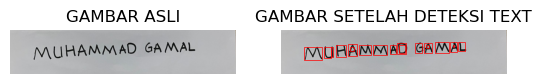

In [2]:
def detect_letters(image_path):
# Baca gambar menggunakan scikit-image
    image = io.imread(image_path)
    
# Ubah gambar ke skala keabuan
    gray = color.rgb2gray(image)
    
# Lakukan thresholding untuk mengubah gambar ke binary
    threshold = gray < 0.5
    
# Terapkan operasi morfologi untuk membersihkan gambar
    clean_image = measure.label(threshold)
    
# Temukan kontur huruf
    contours = measure.find_contours(clean_image, 0.8)
    
 # Deteksi huruf berdasarkan area dan aspek rasio
    detected_letters = []
    for contour in contours:
        y, x = contour[:, 0], contour[:, 1]
        ymin, ymax = int(min(x)), int(max(x))
        xmin, xmax = int(min(y)), int(max(y))
        width = xmax - xmin
        height = ymax - ymin
        area = width * height
        aspect_ratio = width / height
        if area > 100 and aspect_ratio > 0.2:
            detected_letters.append((xmin, ymin, width, height))
    
    return detected_letters

# Path file gambar
image_path = 'gamal.jpg'

# Buka gambar menggunakan scikit-image
image = io.imread(image_path)

# Tampilkan gambar awal
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('off')
plt.title('GAMBAR ASLI')

# Panggil fungsi deteksi huruf
detected_letters = detect_letters(image_path)

# Tampilan gambar dengan persegi panjang yang mengelilingi huruf yang terdeteksi
plt.subplot(1, 2, 2)
plt.imshow(image)
plt.axis('off')
plt.title('GAMBAR SETELAH DETEKSI TEXT')

# Tampilan persegi panjang yang mengelilingi huruf yang terdeteksi
for (x, y, width, height) in detected_letters:
    rect = plt.Rectangle((y, x), height, width, edgecolor='r', linewidth=0.5, fill=False)
    plt.gca().add_patch(rect)
    
# muhammadgamal_202131035
plt.show()